In [13]:
from astropy.io import fits
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import astropy.units as u
from photutils.centroids import centroid_com
from photutils import CircularAperture, CircularAnnulus,aperture_photometry
from photutils.detection import DAOStarFinder
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from photutils.utils import calc_total_error
from astropy.stats import sigma_clip
from astropy.table import Table
import pandas as pd
import uncertainties
from matplotlib.colors import LogNorm
from scipy.interpolate import UnivariateSpline
from astropy.stats import sigma_clipped_stats
from photutils.centroids import centroid_sources
import astroalign as aa

In [14]:
# Define path
d = 'C:/Users/Tim/Downloads/'

In [15]:
def bias_subtract(data):
    '''
    PURPOSE:
            This function subtracts the bias from the data.

    INPUTS:
            [data; np.array, float]:  The data to be bias subtracted.

    OUTPUTS:
            [new_data; np.array, float]: The bias subtracted data.
    '''
    # Make empty array to store new data
    new_data = np.empty(data.shape)
    # Loop over columns
    for i in range(data.shape[1]):  # Loop over columns
        # Get overscan data
        overscan_data = data[-16:, i]
        # Get median of overscan data
        overscan_median = np.median(overscan_data)
        new_data[:, i] = data[:, i] - overscan_median  # Subtract overscan_median from each column

    return new_data

C:/Users/Tim/Downloads/standards\groupb_photo_stds-0001_SI_solved.fits


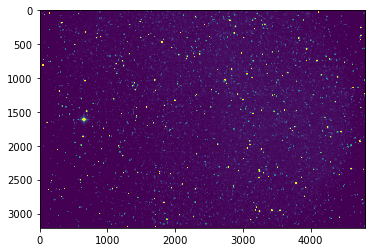

C:/Users/Tim/Downloads/standards\groupb_photo_stds-0002_SI_solved.fits


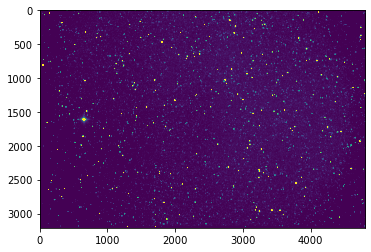

C:/Users/Tim/Downloads/standards\groupb_photo_stds-0003_SI_solved.fits


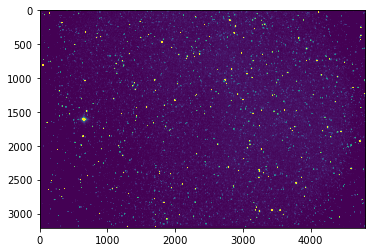

In [17]:
#Define Filter
filter='SI'
files = glob.glob(d+'standards/*{}*solved*.fits'.format(filter))


for i in files:
    # Open file
    image = fits.open(i)
    header = image[0].header
    print(i)
    # Get data
    data = image[0].data
    # Plot tjhe data
    plt.imshow(data,vmin=np.median(data),vmax=np.median(data)+100)
    plt.show()

In [18]:
for i,file in enumerate(files):
    if i==0:
        image0 = fits.open(file)
        data0 = bias_subtract(image[0].data)
        header0 = image[0].header
        stack_array = data0
    else:
        image = fits.open(file)
        data = bias_subtract(image[0].data)
        
        registered_image, footprint = aa.register(data, data0,fill_value='nan')
        
        stack_array = np.dstack((stack_array,registered_image))
        
median_image = np.nanmedian(stack_array,axis=2) #median combine cube

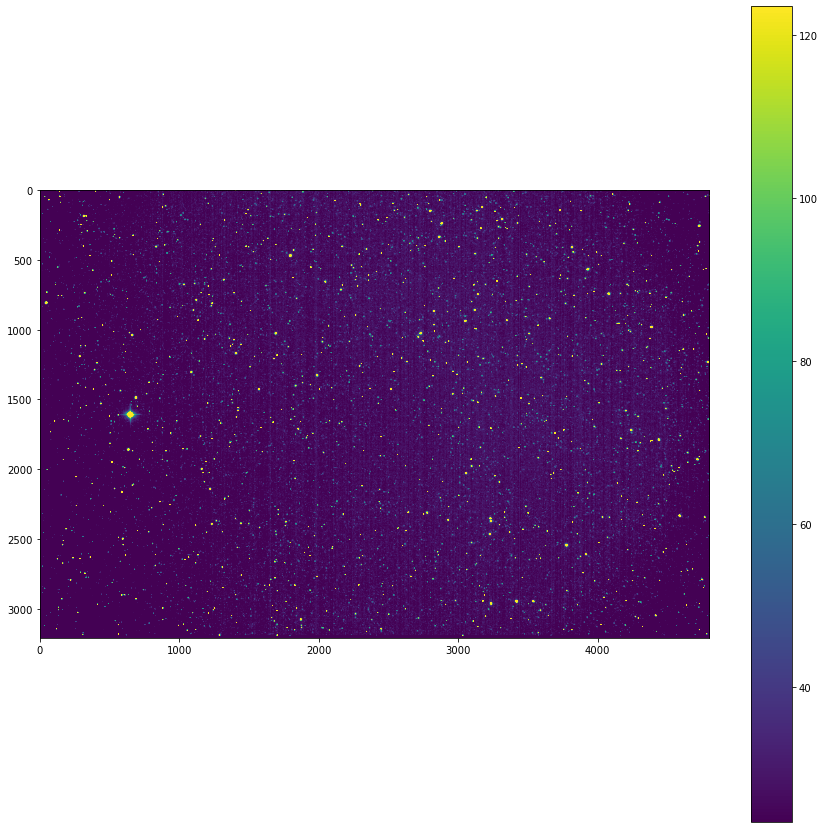

In [19]:
plt.figure(figsize=(15,15))
plt.imshow(median_image,vmin=np.median(median_image),vmax=np.median(median_image)+100)
plt.colorbar()
plt.show()

In [20]:
fits.writeto('C:/Users/Tim/Downloads/median_{}.fits'.format(filter),median_image,header = header0,overwrite=True)